### EDA: Asignación de becas Unialpes

__Ejercicio propuesto por:__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Diego Alejandro Cely Gómez.

__Desarrollado por:__ Ibeth Karine Terán

__Fecha última actualización__: 08/09/2024

## Desarrollo de una herramienta analítica usando recursos nativos de Python

Para el desarrollo de esta herramiento se utilizan únicamente recursos nativos de Python. Adicionalmente, previo al desarrollo de cada fase, se explica su objetivo. 

### Contexto: exploración del potencial para asignar becas Unialpes

La Universidad de los Alpes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Becas para los Mejores, entre otros, han sido revolucionarios al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades más prestigiosas del país.

Actualmente, la universidad quiere evaluar el potencial impacto que tendrían algunos programas de acción afirmativa para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas a personas interesadas en becas. Se cuenta con información respecto a la edad, género, estado civil, estrato socioeconómico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas encuestadas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar a los beneficiarios de las becas. Puntualmente, se espera que, para distintas reglas de selección (ej., pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca una caracterización de los potenciales beneficiarios de las becas (a partir de estadísticas descriptivas y visualizaciones), de forma que exista un sustento para elegir la regla de selección adecuada.

## Fase 1: obtener e inspeccionar archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, por lo que se cuenta con la información en archivos de texto plano (`.txt`). Cada archivo corresponde a uno de los atributos antes mencionados y están estructurados de forma que todos relacionan a las personas encuestadas en el mismo orden (i.e., en cada archivo la primera línea corresponde a un dato de la primera persona encuestada, la segunda línea corresponde a un dato de la segunda persona encuestada, etc.).

Los archivos con los que cuentas son:

* `"edad.txt"`: un archivo con la edad de cada persona encuestada;
* `"escolaridad.txt"`: un archivo con el nivel de escolaridad de cada persona encuestada;
* `"estado_civil.txt"`: un archivo con el estado civil de cada persona encuestada;
* `"estrato.txt"`: un archivo con el estrato socioeconómico de cada persona encuestada;
* `"genero.txt"`: un archivo con el género de cada persona encuestada;
* `"promedio.txt"`: un archivo con el promedio académico de cada persona encuestada;
* `"region.txt"`: un archivo con la región de proveniencia de cada persona encuestada.

In [7]:
# Librerias
import math
import matplotlib.pyplot as plt

### Cargue de inputs

In [9]:
def leer_archivo (ruta):
    with open(ruta, "r") as documento:
        lineas = documento.read()
        lista_archivo = lineas.splitlines()
     
        return(lista_archivo)

archivos = ["edad", "escolaridad", "estado_civil", "estrato", "genero", "promedio", "region"]
diccionario_datos = {}

for archivo in archivos:
    lista = leer_archivo("../Data/1_Scholarships_Unialpes/"+ archivo + ".txt")
    
    if archivo == "edad" or archivo == "estrato":
        lista = [int(elemento) for elemento in lista]
    elif archivo == "promedio":
        lista = [float(elemento) for elemento in lista]
        
    diccionario_datos[archivo] = lista

### Estadísticas descriptivas básicas

In [10]:
# Implementa tu respuesta en esta celda
def calculo_media (lista_a_calcular):
    suma = sum(lista_a_calcular)
    media = suma/(len(lista))
    return (media)

def calculo_mediana (lista_a_calcular):
    lista_ordenada = sorted(lista_a_calcular)
    num_datos = len(lista_ordenada)
    if num_datos % 2 == 0:
        mediana = (lista_ordenada[int(num_datos/2)-1] + lista_ordenada[int(num_datos/2)])/2
    if num_datos % 2 != 0:
        mediana = lista_ordenada[int(num_datos/2)-1]
    return(mediana)

def calculo_varianza_desv_std (lista_a_calcular, media):
    sumatoria = 0
    for i in lista_a_calcular:
        sumatoria += (i - media)**2
    varianza = sumatoria/len(lista_a_calcular)
    desv_std = math.sqrt(varianza)
    return [varianza, desv_std]
        
def histograma_cuantitativo (lista_a_calcular,bins):
    # plt.figure(figsize=(5, 6))
    fig, ax = plt.subplots(figsize=(5, 5.8))    
    
    n, bins, patches = plt.hist(lista_a_calcular, bins=bins, density=False, edgecolor='black')
    #  SABER LOS INTERVALOS print(bins)
    # fig.suptitle("Histograma",color="black")
    ax.grid(True, axis='y')
    #ax.set_xticks(bins)
    ax.set_ylabel('Frecuencia absoluta')
    
    cm = plt.cm.get_cmap('BuGn')
    col = (n-n.min())/(n.max()-n.min())
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.show()
        
    return fig

def histograma_cualitativo (lista_a_calcular):
    fig, ax = plt.subplots(figsize=(5, 5.8))   
    valores_unicos = list(set(lista_a_calcular))
    mayus_valores_unicos = [vu.capitalize() for vu in valores_unicos]

    frecuencia_valores_unicos = [lista_a_calcular.count(k) for k in valores_unicos]
    
    # escala de colores
    cm = plt.cm.get_cmap('Pastel2')
    def rescala_cm(list_frec):
        rescala = [(val - min(frecuencia_valores_unicos)) / (max(frecuencia_valores_unicos) - min(frecuencia_valores_unicos)) for val in list_frec]
        return rescala

    plt.bar(mayus_valores_unicos, frecuencia_valores_unicos, color=cm(rescala_cm(frecuencia_valores_unicos)), edgecolor='black')
    ax.grid(True, axis='y')
    ax.set_ylabel('Frecuencia absoluta')
    plt.show()

        
    return fig

def pastel (lista_a_calcular):
    # plt.figure(figsize=(5, 6))
    fig, ax = plt.subplots(figsize=(5, 5.8))   
    valores_unicos = list(set(lista_a_calcular))
    # mayus_valores_unicos = [vu.capitalize() for vu in valores_unicos]
    frecuencia_valores_unicos = [lista_a_calcular.count(k) for k in valores_unicos]

    # Escala con librerias externas
    # cm = plt.cm.get_cmap("tab20b")
    # rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
    # escala de colores
    cm = plt.cm.get_cmap('Set3')
    def rescala_cm(list_frec):
        rescala = [(val - min(frecuencia_valores_unicos)) / (max(frecuencia_valores_unicos) - min(frecuencia_valores_unicos)) for val in list_frec]
        return rescala
    
    wedges, texts, autotexts = ax.pie(frecuencia_valores_unicos, colors=cm(rescala_cm(frecuencia_valores_unicos)), autopct='%1.1f%%', textprops=dict(color="black"))

    ax.legend(wedges, valores_unicos,
          title="Variable",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

    return fig


                       EDAD                
Media: 48.748
Mediana: 49.0
Varianza: 345.768496
Desviación Estandar: 18.59485133040864


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('BuGn')


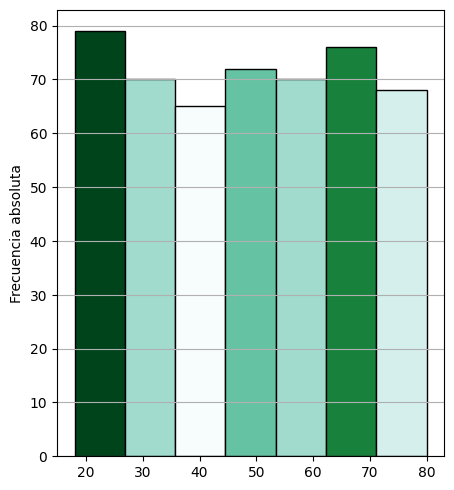

In [11]:
print("                       EDAD                ")
edad = diccionario_datos["edad"]
media_edad = calculo_media(edad)
print(f'Media: {media_edad}')
mediana_edad = calculo_mediana(edad)
print(f'Mediana: {mediana_edad}')
varianza_dsv_std_edad = calculo_varianza_desv_std(edad, media_edad)
print(f'Varianza: {varianza_dsv_std_edad[0]}\nDesviación Estandar: {varianza_dsv_std_edad[1]}')
figura = histograma_cuantitativo(edad,7)

                 ESCOLARIDAD            


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Pastel2')


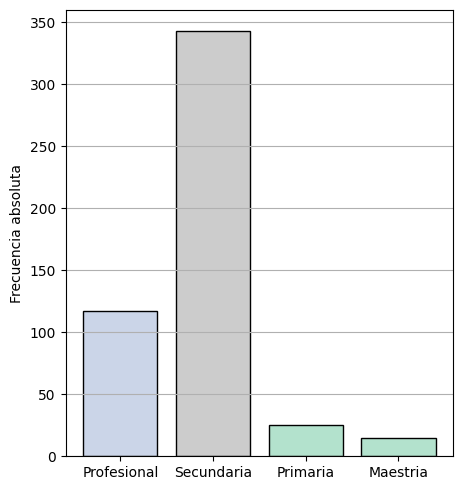

In [12]:
print("                 ESCOLARIDAD            ")
escolaridad = diccionario_datos["escolaridad"]
figura_cual_escolaridad = histograma_cualitativo(escolaridad)

                ESTADO CIVIL          


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Pastel2')


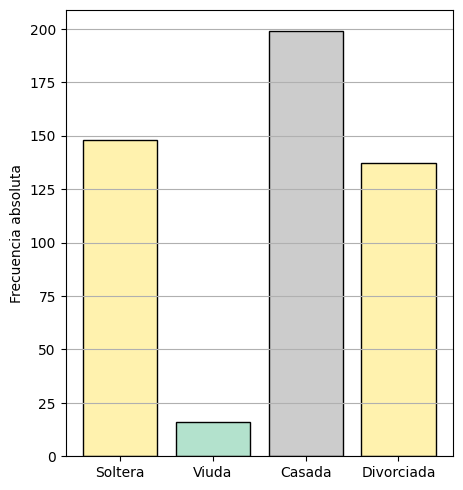

In [13]:
print("                ESTADO CIVIL          ")
estado_cvl = diccionario_datos['estado_civil']
figura_cual_estado_cvl = histograma_cualitativo(estado_cvl)

                  ESTRATO      
Media: 2.308
Mediana: 2.0
Varianza: 0.9531359999999944 
Desviación Estandar: 0.9762868430947917


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Set3')


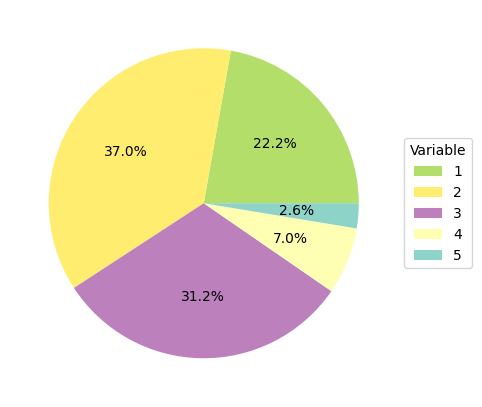

In [14]:
print("                  ESTRATO      ")
estrato = diccionario_datos['estrato']
media_estrato = calculo_media(estrato)
print(f'Media: {media_estrato}')
varianza_dsv_std_estrato = calculo_varianza_desv_std(estrato, media_estrato)
mediana_estrato = calculo_mediana(estrato)
print(f'Mediana: {mediana_estrato}')
print(f'Varianza: {varianza_dsv_std_estrato[0]} \nDesviación Estandar: {varianza_dsv_std_estrato[1]}')
fig_estrato = pastel(estrato)

                GÉNERO


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Set3')


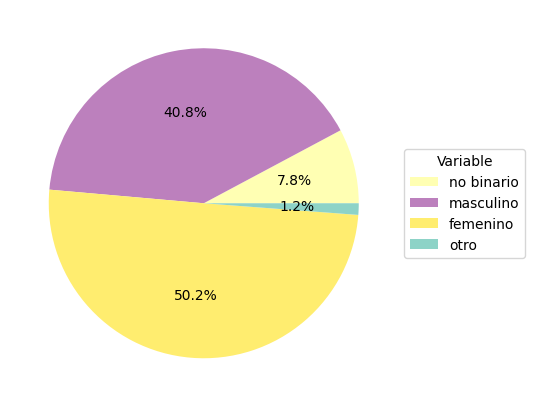

In [15]:
print("                GÉNERO")
genero = diccionario_datos["genero"]
figura_pastel = pastel(genero)

                     PROMEDIO
Media: 2.6212000000000004
Mediana: 2.7
Varianza: 1.2452705600000036 
Desviación Estandar: 1.1159169144698917


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('BuGn')


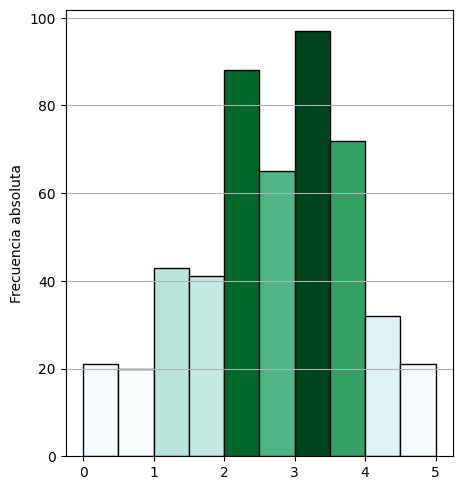

In [16]:
print("                     PROMEDIO")
promedio = diccionario_datos["promedio"]
media_promedio = calculo_media(promedio)
print(f'Media: {media_promedio}')
varianza_dsv_std_promedio = calculo_varianza_desv_std(promedio, media_promedio)
mediana_prom = calculo_mediana(promedio)
print(f'Mediana: {mediana_prom}')
print(f'Varianza: {varianza_dsv_std_promedio[0]} \nDesviación Estandar: {varianza_dsv_std_promedio[1]}')
figura = histograma_cuantitativo(promedio,10)

              REGIÓN


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Set3')


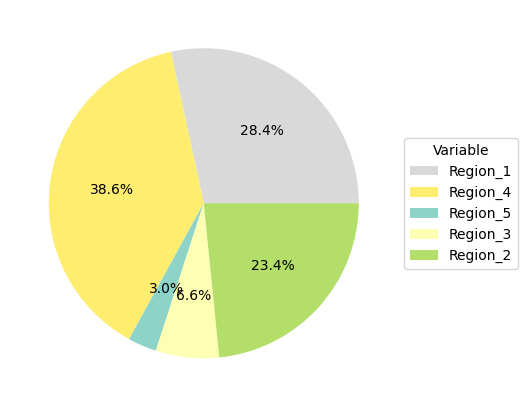

In [17]:
print("              REGIÓN")
region = diccionario_datos["region"]
figura_pastel = pastel(region)

##### Conclusiones:

- La edad presenta una distribución uniforme con alta variabilidad, ya que no se observa una tendencia central marcada. Por lo que si sólo se considerara este parámetro para la asignación de becas no sería muy adecuado, debido a que seria desproporcional.
- La mayoria de las personas encuestadas han alcanzado un grado de escolaridad de secundaria y están casadas.
- Más del 50% de las personas encuestadas son mujeres. El 9% de la población corresponde a géneros diferentes a másculino y femenino.
- La mayor parte de las personas encuestadas provienen de las regiones 4, 2 y 1. Encontrandose en una similar y en alta proporción las regiones 1 y 2, mientras que de la región 5 proviene sólo el 3%.
- La gráfica de promedios exhibe un leve sesgamiento hacia la izquierda y comportamiento bimodal


## Fase 2: abordar la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que considerar las características sociodemográficas (ej., género, región, etc.) es parte del espíritu del programa, mientras que otros piensan que el criterio de selección debería centrarse estrictamente en lo económico y académico. Dado esto, el comité ha sugerido evaluar dos propuestas, suponiendo un número $N$ de becas disponibles.

* La primera propuesta sugiere que se deben tomar las diferentes regiones y géneros y, para cada una de las combinaciones de estos dos criterios, asignar una cantidad de becas proporcional al número de personas de esa subpoblación con respecto al total de personas encuestadas. Dentro de cada subpoblación, las becas deben aprobarse a las personas con mejor promedio académico.

* La segunda propuesta sugiere que se deben tomar en orden ascendente los estratos y, en cada uno de ellos, asignar una beca a cada una de las personas que se encuentren dentro del 2% con mejor promedio académico en esa subpoblación. En caso de quedar becas disponibles luego de haber cubierto todos los estratos, se repite el mismo esquema hasta asignar todas las becas disponibles, excluyendo a las personas a quienes se les haya asignado una beca en alguna ronda anterior.

### Definición de la pregunta de negocio y analytics

**PREGUNTA DE NEGOCIO:** ¿La distribución de becas debe tener en cuenta solamente las condiciones sociodemográficas como región y género mediante una asignación proporcional a cada subpoblación, o debe basarse en el aspecto económico, priorizando los estrato más bajos (poblaciones vulnerables) y asignando becas en todos los estratos a aquellos que han destacado academicamente?

**PREGUNTA DE ANALYTICS:** ¿Cúal es la forma de distribución y qué medidas de dispersión (si aplica) tienen los de los datos de promedio, género, región y estrato?

### Primera propuesta: Selección de los principales beneficiarios según el número N de becas disponibles

In [18]:
# Implementa tu respuesta en esta celda
edad_copia = edad[:]
escolaridad_copia = escolaridad[:]
estado_cvl_copia = estado_cvl[:]
estrato_copia = estrato[:]
genero_copia = genero[:]
promedio_copia = promedio[:]
region_copia = region[:]

def organizar_indices_lista_desde_otra_lista_reslistaindxord (lista_indices, lista_base):
    lista_indice_valor_f = [(lista_indices[i], lista_base[i]) for i in range(0,len(lista_base))]
    lista_indice_valor_cop_f = lista_indice_valor_f[:]
    lista_indx_val_orgz = sorted(lista_indice_valor_cop_f, key=lambda lista_indice_valor_cop_f: lista_indice_valor_cop_f[1], reverse=True)
    lista_indx_orgz = [indice[0] for indice in lista_indx_val_orgz]
    return lista_indx_orgz

def PROPUESTA1_reg_gen (N):
    val_uni_reg = list(set(region_copia))
    regiones = sorted(val_uni_reg)


    val_uni_gnro = list(set(genero_copia))
    generos = sorted(val_uni_gnro)

    # Encuentro los grupos totales
    grupos = [(reg,gen) for reg in regiones for gen in generos]
    # Hago tuplas de region, genero para toda la población
    reg_gen_poblacion_total = [(region_copia[y], genero_copia[y]) for y in range(0, len(region_copia))]
    # Encuentro cuantas personas hay en cada grupo
    frec_reg_gen_pob_total = [reg_gen_poblacion_total.count(grup) for grup in grupos]
    # porcentaje de cada grupo de region_genero
    porc_reg_gen_pob_total = [(frecgrup/len(region_copia))*100 for frecgrup in frec_reg_gen_pob_total]
    
    # organizar_por_indice
    lista_indice_valor = list(enumerate(porc_reg_gen_pob_total))
    lista_indice_valor_cop = lista_indice_valor[:]
    lista_indx_val_organizada = sorted(lista_indice_valor_cop, key=lambda lista_indice_valor_cop: lista_indice_valor_cop[1], reverse=True)
    lista_indices_org = [indice[0] for indice in lista_indx_val_organizada]

    # porcentajes organizados de mayor a menor y lista correspondiente de grupos
    porc_rg_pob_total_cop = porc_reg_gen_pob_total[:]
    porc_organizados_grupos = sorted(porc_rg_pob_total_cop, reverse=True)
    grupo_organ_x_porc = [grupos[indice_buscar] for indice_buscar in lista_indices_org]

    # Distribución de becas
    becas_por_grupo = []
    for porc_rg_org in porc_organizados_grupos:
        # Dar una beca a poblaciones minoritarias
        if porc_rg_org >0 and porc_rg_org < (1*100/N) and sum(becas_por_grupo) < N:
            becas_por_grupo.append(1)
        else:
            if sum(becas_por_grupo) < N:
                becas_por_grupo.append(round(porc_rg_org*N/100))
            else:
                becas_por_grupo.append(0)

    # sum_becas_asign = sum(becas_por_grupo)

    # ------------ Información -----------------

    count_num_gp = 0
    num_grupos_becados = 0
     
    for grupo_orga in grupo_organ_x_porc:
        becas_asig = becas_por_grupo[count_num_gp]
        if becas_asig > 0:
            num_grupos_becados += 1
            count_num_gp += 1
    
    print(f"""PROPUESTA 1: De acuerdo a los criterios se definió que de {len(grupo_organ_x_porc)} grupos, se becaron a {num_grupos_becados} grupos. 
             A continuación se muestra la distribución de becas por grupos: \n""")
    grupos_becados = grupo_organ_x_porc[:num_grupos_becados]
    puesto_grupo_becado = 0
    # ------------------------------------------
    
    # Asignación de becas a mejores promedios
    lista_becados_1p = []
    for (reg,gen) in grupos_becados:
        print(f'Grupo: {reg,gen} ---> No.Becas: {becas_por_grupo[puesto_grupo_becado]}')
        indxs_miembro_todos = [indx_gen for indx_gen in range(len(region_copia)) if region_copia[indx_gen]==reg and genero_copia[indx_gen]==gen]
        promedios_miembros = [promedio_copia[indx_miem] for indx_miem in indxs_miembro_todos]
    
        idx_miem_todos_orgz_x_prom = organizar_indices_lista_desde_otra_lista_reslistaindxord(indxs_miembro_todos, promedios_miembros)
        indx_seleccionados = idx_miem_todos_orgz_x_prom[:becas_por_grupo[puesto_grupo_becado]]
        for idx_selecc in indx_seleccionados:
            lista_becados_1p.append(idx_selecc)
        print(indx_seleccionados)
        print("----------------------------------------\n")
    
        puesto_grupo_becado += 1
    
    return lista_becados_1p

# Para el ejemplo se toman 100 becas a asignar
N = 100
lista_becados_1p = PROPUESTA1_reg_gen(N)
print(f'Becas: {N}')
print(f'Lista de todos los seleccionados: {lista_becados_1p}')

PROPUESTA 1: De acuerdo a los criterios se definió que de 20 grupos, se becaron a 16 grupos. 
             A continuación se muestra la distribución de becas por grupos: 

Grupo: ('Region_4', 'femenino') ---> No.Becas: 21
[243, 60, 308, 70, 256, 453, 108, 213, 145, 433, 17, 36, 53, 193, 377, 51, 30, 123, 367, 466, 120]
----------------------------------------

Grupo: ('Region_4', 'masculino') ---> No.Becas: 14
[491, 159, 454, 319, 434, 169, 202, 291, 489, 341, 254, 357, 482, 85]
----------------------------------------

Grupo: ('Region_1', 'masculino') ---> No.Becas: 14
[162, 394, 9, 452, 222, 398, 428, 281, 33, 374, 149, 175, 458, 163]
----------------------------------------

Grupo: ('Region_2', 'femenino') ---> No.Becas: 12
[363, 109, 355, 287, 262, 250, 337, 69, 107, 294, 368, 386]
----------------------------------------

Grupo: ('Region_1', 'femenino') ---> No.Becas: 12
[7, 207, 137, 409, 134, 45, 74, 356, 92, 115, 321, 366]
----------------------------------------

Grupo: ('Regi

### Segunda propuesta: Selección de los principales beneficiarios según el número N de becas disponibles

In [19]:
# Implementa tu respuesta en esta celda
def PROPUESTA2_prom(N):
    val_uni_estrat = list(set(estrato_copia))
    val_uni_estrat_copia = val_uni_estrat[:]
    estratos_orgz = sorted(val_uni_estrat_copia, reverse=False)
    
    ronda = 1
    
    becas_disponibles = True
    lista_becados_2p = []
    print(f"""PROPUESTA 2: Usando los criterios, la distribución de becas se realizó de la siguiente manera: \n""")
    while becas_disponibles == True:
        print("----------------------------------------\n")
        print(f'RONDA {ronda}\n')
        for c_estrato in estratos_orgz:
            indxs_miembro_2p = [indx_gen for indx_gen in range(len(estrato_copia)) if estrato_copia[indx_gen]==c_estrato and indx_gen not in lista_becados_2p]
            promedios_miembros_2p = [promedio_copia[indx_miem_2p] for indx_miem_2p in indxs_miembro_2p]
            
            idx_miem_todos_orgz_x_prom_2p = organizar_indices_lista_desde_otra_lista_reslistaindxord(indxs_miembro_2p, promedios_miembros_2p)
            becados_en_ronda = max([1, round(0.02*(len(promedios_miembros_2p)))])
            seleccionados_2p = idx_miem_todos_orgz_x_prom_2p[:becados_en_ronda]
            if len(lista_becados_2p) >= N:
                becas_disponibles = False
            else:
                becas_disponibles = True
                becas_adicionadas = 0
                seleccionados_estr = []
                for seleccionado in seleccionados_2p:
                    if len(lista_becados_2p) <= N-1:
                        lista_becados_2p.append(seleccionado)
                        seleccionados_estr.append(seleccionado)
                        becas_adicionadas += 1
                print(f'Estrato: {c_estrato} ---> No.Becas: {becas_adicionadas}')
                print(f'Indices de seleccionados: {seleccionados_estr}\n')
        ronda += 1
    
    return lista_becados_2p             

# Para el ejemplo se toman 100 becas a asignar
N = 100
lista_becados_2p = (PROPUESTA2_prom(N))
print(f'Becas: {N}')
print(f'Lista de todos los seleccionados: {lista_becados_2p}')

PROPUESTA 2: Usando los criterios, la distribución de becas se realizó de la siguiente manera: 

----------------------------------------

RONDA 1

Estrato: 1 ---> No.Becas: 2
Indices de seleccionados: [376, 162]

Estrato: 2 ---> No.Becas: 4
Indices de seleccionados: [243, 7, 207, 491]

Estrato: 3 ---> No.Becas: 3
Indices de seleccionados: [60, 471, 109]

Estrato: 4 ---> No.Becas: 1
Indices de seleccionados: [394]

Estrato: 5 ---> No.Becas: 1
Indices de seleccionados: [259]

----------------------------------------

RONDA 2

Estrato: 1 ---> No.Becas: 2
Indices de seleccionados: [363, 283]

Estrato: 2 ---> No.Becas: 4
Indices de seleccionados: [137, 478, 409, 452]

Estrato: 3 ---> No.Becas: 3
Indices de seleccionados: [159, 9, 49]

Estrato: 4 ---> No.Becas: 1
Indices de seleccionados: [53]

Estrato: 5 ---> No.Becas: 1
Indices de seleccionados: [99]

----------------------------------------

RONDA 3

Estrato: 1 ---> No.Becas: 2
Indices de seleccionados: [385, 287]

Estrato: 2 ---> No.Bec

### Comparación de las propuestas


                                PROPUESTA 1
PROPUESTA 1: De acuerdo a los criterios se definió que de 20 grupos, se becaron a 16 grupos. 
             A continuación se muestra la distribución de becas por grupos: 

Grupo: ('Region_4', 'femenino') ---> No.Becas: 21
[243, 60, 308, 70, 256, 453, 108, 213, 145, 433, 17, 36, 53, 193, 377, 51, 30, 123, 367, 466, 120]
----------------------------------------

Grupo: ('Region_4', 'masculino') ---> No.Becas: 14
[491, 159, 454, 319, 434, 169, 202, 291, 489, 341, 254, 357, 482, 85]
----------------------------------------

Grupo: ('Region_1', 'masculino') ---> No.Becas: 14
[162, 394, 9, 452, 222, 398, 428, 281, 33, 374, 149, 175, 458, 163]
----------------------------------------

Grupo: ('Region_2', 'femenino') ---> No.Becas: 12
[363, 109, 355, 287, 262, 250, 337, 69, 107, 294, 368, 386]
----------------------------------------

Grupo: ('Region_1', 'femenino') ---> No.Becas: 12
[7, 207, 137, 409, 134, 45, 74, 356, 92, 115, 321, 366]
----------

C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('BuGn')


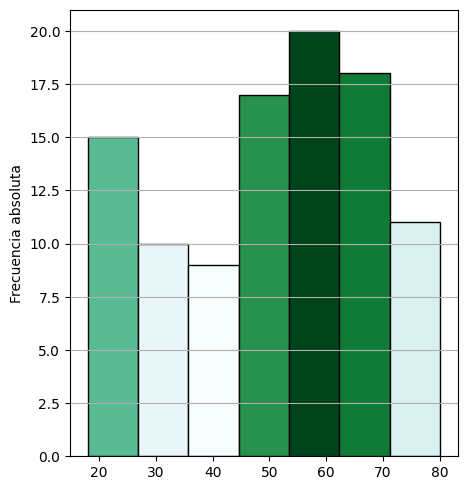

C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Pastel2')



                  ESCOLARIDAD            


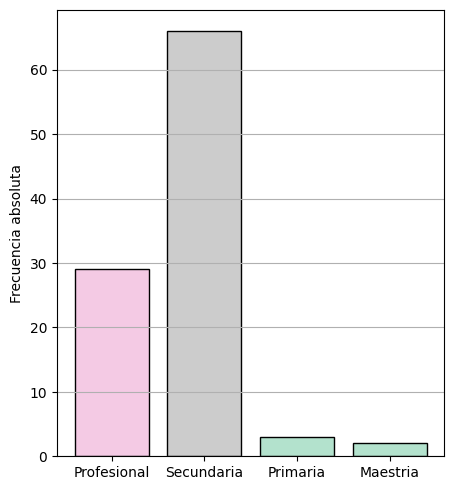


                   ESTRATO      


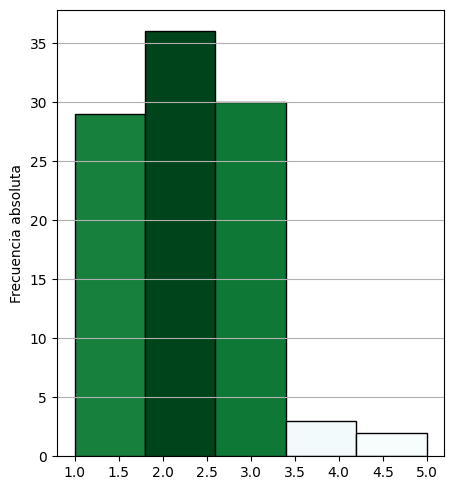


                 GÉNERO


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Set3')


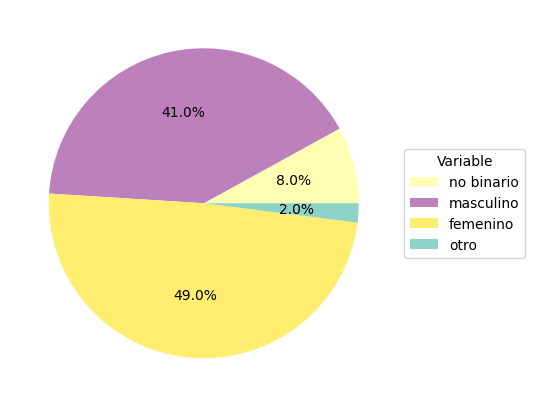


                  PROMEDIO


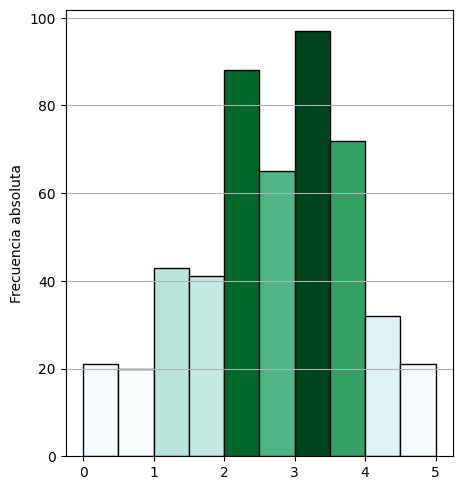


               REGIÓN


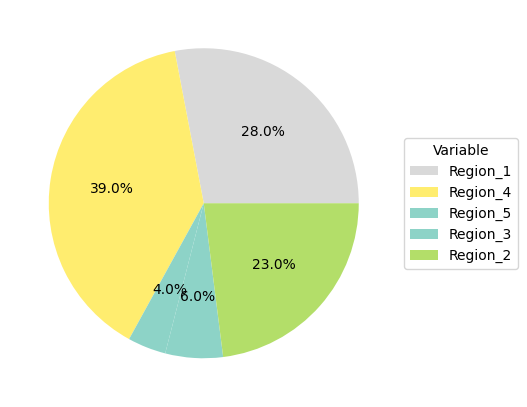


Lista de todos los seleccionados: [243, 60, 308, 70, 256, 453, 108, 213, 145, 433, 17, 36, 53, 193, 377, 51, 30, 123, 367, 466, 120, 491, 159, 454, 319, 434, 169, 202, 291, 489, 341, 254, 357, 482, 85, 162, 394, 9, 452, 222, 398, 428, 281, 33, 374, 149, 175, 458, 163, 363, 109, 355, 287, 262, 250, 337, 69, 107, 294, 368, 386, 7, 207, 137, 409, 134, 45, 74, 356, 92, 115, 321, 366, 376, 471, 385, 161, 79, 253, 289, 188, 240, 113, 99, 228, 422, 138, 194, 22, 96, 104, 259, 283, 361, 179, 49, 478, 136, 375, 195]

                                PROPUESTA 2
PROPUESTA 2: Usando los criterios, la distribución de becas se realizó de la siguiente manera: 

----------------------------------------

RONDA 1

Estrato: 1 ---> No.Becas: 2
Indices de seleccionados: [376, 162]

Estrato: 2 ---> No.Becas: 4
Indices de seleccionados: [243, 7, 207, 491]

Estrato: 3 ---> No.Becas: 3
Indices de seleccionados: [60, 471, 109]

Estrato: 4 ---> No.Becas: 1
Indices de seleccionados: [394]

Estrato: 5 ---> No.Bec

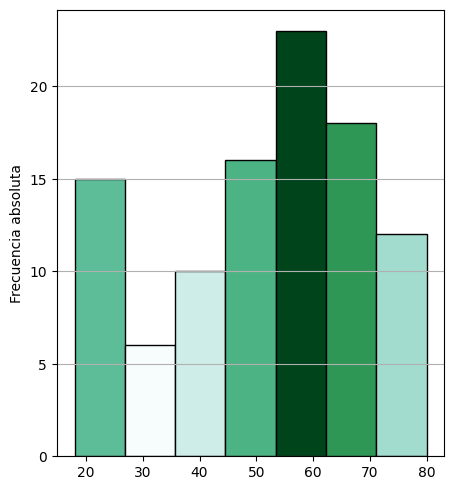


                  ESCOLARIDAD            


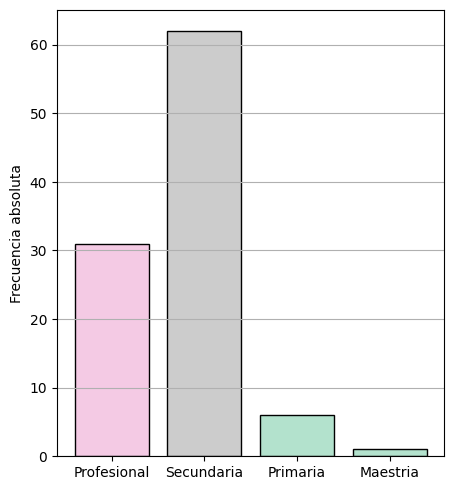


                   ESTRATO      


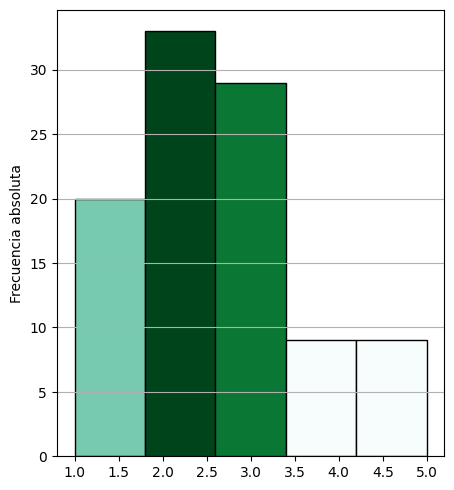


                 GÉNERO


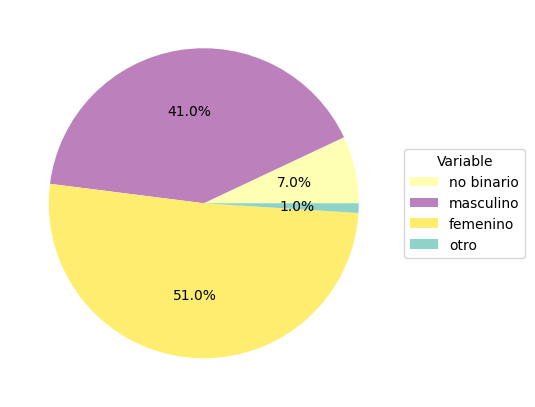


                  PROMEDIO


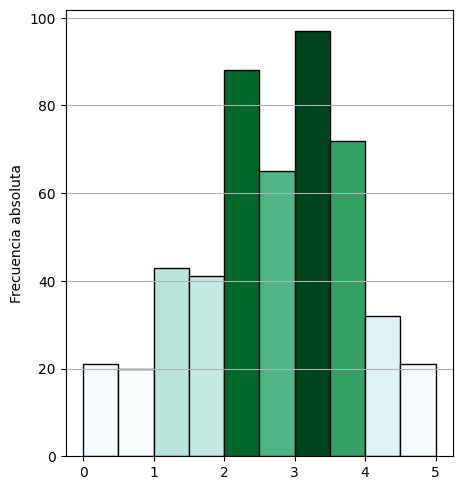


               REGIÓN


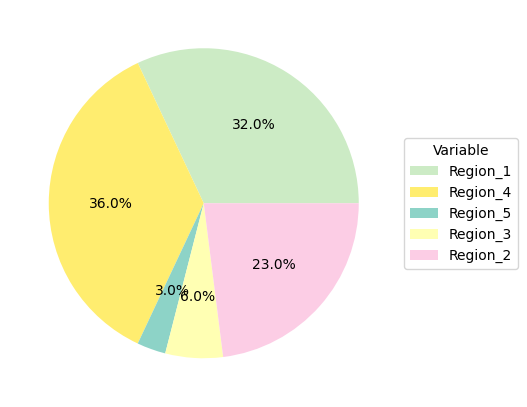

In [20]:
# Implementa tu respuesta en esta celda  
def graficas_becados(lista_becados):
    edad_becados = [diccionario_datos["edad"][idx_bec] for idx_bec in lista_becados]
    escolaridad_becados = [diccionario_datos["escolaridad"][idx_bec] for idx_bec in lista_becados]
    estado_cvl_becados = [diccionario_datos["estado_civil"][idx_bec] for idx_bec in lista_becados]
    estrato_becados = [diccionario_datos["estrato"][idx_bec] for idx_bec in lista_becados]
    genero_becados = [diccionario_datos["genero"][idx_bec] for idx_bec in lista_becados]
    promedio_becados = [diccionario_datos["promedio"][idx_bec] for idx_bec in lista_becados]
    region_becados = [diccionario_datos["region"][idx_bec] for idx_bec in lista_becados]

    
    print("\n                       EDAD                ")
    media_edad_bec = calculo_media(edad_becados)
    varianza_dsv_std_edad_bec = calculo_varianza_desv_std(edad_becados, media_edad_bec)
    #print(f'Media: {media_edad_bec}')
    #print(f'Varianza: {varianza_dsv_std_edad_bec[0]}\nDesviación Estandar: {varianza_dsv_std_edad_bec[1]}')
    histograma_cuantitativo(edad_becados,7)

    print("\n                  ESCOLARIDAD            ")
    histograma_cualitativo(escolaridad_becados)
    
    # Considero que no es una principal característica 
    #print("\n                 ESTADO CIVIL          ")
    #figura_cual_estado_cvl_bec = histograma_cualitativo(estado_cvl_becados)

    print("\n                   ESTRATO      ")
    media_estrato_bec = calculo_media(estrato_becados)
    varianza_dsv_std_estrato_bec = calculo_varianza_desv_std(estrato_becados, media_estrato_bec)
    #print(f'Media: {media_estrato_bec}')
    #print(f'Varianza: {varianza_dsv_std_estrato_bec[0]} \nDesviación Estandar: {varianza_dsv_std_estrato_bec[1]}')
    fig_estrato_bec = histograma_cuantitativo(estrato_becados,5)

    print("\n                 GÉNERO")
    figura_pastel = pastel(genero_becados)

    print("\n                  PROMEDIO")
    media_promedio_bec = calculo_media(promedio_becados)
    varianza_dsv_std_promedio_bec = calculo_varianza_desv_std(promedio_becados, media_promedio_bec)
    #print(f'Media: {media_promedio_bec}')
    #print(f'Varianza: {varianza_dsv_std_promedio_bec[0]} \nDesviación Estandar: {varianza_dsv_std_promedio_bec[1]}')
    figura = histograma_cuantitativo(promedio,10)

    print("\n               REGIÓN")
    pastel(region_becados)
    return

def comparacion(N):
    print('\n                                PROPUESTA 1')
    becados1p = PROPUESTA1_reg_gen(N)
    graficas_becados(becados1p)
    print(f'\nLista de todos los seleccionados: {becados1p}')
    
    print('\n                                PROPUESTA 2')
    becados2p = PROPUESTA2_prom(N)
    print(f'\nLista de todos los seleccionados: {becados2p}')
    graficas_becados(becados2p)
    
N = 100
comparacion(N)

## Fase 3: Desarrollo de una solución analítica

Reconociendo la complejidad de este problema y viendo el potencial del análisis de datos para enriquecer la discusión, el comité requiere una herramienta analítica que permita definir y evaluar nuevas propuestas de asignación de becas. Se debe poder:

1. Ingresar el número de becas disponibles (ej., `N=0`).


2. Ingresar un rango de edad para los candidatos factibles (ej., `min_edad=99, max_edad=100`).


3. Elegir cualesquiera de las siguientes tres características: género, estrato, región (ej., `caracteristicas=["genero", "estrato"]`).

    
4. Ingresar interactivamente (durante la ejecución de la herramienta) el porcentaje del total de las becas que se asignará a las personas con mejor promedio académico dentro de cada una de las combinaciones de las características elegidas. Por ejemplo, si se eligen las características `"genero"` y `"estrato"`, deberá asignarse un porcentaje a cada combinación (ej., asignar 3\% de las becas al género `"masculino"` del estrato `1`, asignar 5\% de las becas al género `"femenino"` del estrato `1`, etc.).

La herramienta debe permitir al comité configurar una nueva propuesta y seleccionar al grupo de potenciales beneficiarios de las becas de acuerdo con la propuesta configurada. Además, la herramienta debe exponer métricas y visualizaciones de las principales características demográficas de los potenciales beneficiarios de las becas.

### Nueva propuesta: Selección de los principales beneficiarios según el número N de becas disponibles

In [21]:
# Implementa tu respuesta en esta celda
def ingresar_valor(solicitud):
    while True:
        try:
            valor = float(input(solicitud))
            if valor >= 0:
                return valor
            else:
                print("Por favor, ingrese un número positivo.")
        except ValueError:
            print("Por favor, ingrese un valor numérico válido.")

def HERRAMIENTA_ANALITICA(N, min_edad, max_edad, caracteristicas):

    indx_candi_fac_edad = [indx for indx in range(0, len(promedio_copia)) if edad_copia[indx] >= min_edad and edad_copia[indx] <= max_edad]
    
    # Obtengo los valores unicos
    val_uni_reg = list(set(region_copia))
    regiones = sorted(val_uni_reg)
    val_uni_gnro = list(set(genero_copia))
    generos = sorted(val_uni_gnro)
    val_uni_estrato = list(set(estrato_copia))
    estrs = sorted(val_uni_estrato)
    if N == 0:
        print('Definió que el número de becas es 0, por lo tanto, no se asignó ninguna beca.')
    elif N == (len(indx_candi_fac_edad)):
        becados_facti = indx_candi_fac_edad
        print('El número de candidatos factibles es exactamente igual que el número de becas disponibles, por lo tanto se les asignó estas becas a dichas personas.')
        return becados_facti
    elif N > (len(indx_candi_fac_edad)):
        print(f"""Se asignaron {(len(indx_candi_fac_edad))} becas, pero no se asignaron las becas restantes, ya que el número de candidatos en ese rango de edades es menor que el número de becas a asignar. \nLos indices de los becados son: \n""")
        becados_facti = indx_candi_fac_edad
        return becados_facti
    elif N > 0:
    
        opcion_selec = 7
        
        # OPCION 0: TODAS LAS CARACTERÍSTICAS
        if all(caract in caracteristicas for caract in ["genero", "region", "estrato"]):
            opcion_selec = 0
            # Encuentro todas las combinaciones posibles (grupos) y hago las tuplas de region, genero y estrato para candidatos factibles
            grupos_all = [(reg,gen,estr) for reg in regiones for gen in generos for estr in estrs]
            tuplas_carac_fac_indx_all = [(region_copia[indx_fac], genero_copia[indx_fac], estrato_copia[indx_fac]) for indx_fac in indx_candi_fac_edad]
            # Encuentro cuantas personas hay en cada grupo
        
        # OPCIÓN 1: GÉNERO Y ESTRATO    
        elif all(caract in caracteristicas for caract in ["genero", "estrato"]):
            opcion_selec = 1
            grupos_all = [(gen,estr) for gen in generos for estr in estrs]
            tuplas_carac_fac_indx_all = [(genero_copia[indx_fac], estrato_copia[indx_fac]) for indx_fac in indx_candi_fac_edad]
        
        # OPCIÓN 2: REGIÓN Y GÉNERO
        elif all(caract in caracteristicas for caract in ["region", "genero"]):
            opcion_selec = 2
            grupos_all = [(reg,gen) for reg in regiones for gen in generos]
            tuplas_carac_fac_indx_all = [(region_copia[indx_fac], genero_copia[indx_fac]) for indx_fac in indx_candi_fac_edad]
        
        # OPCIÓN 3: REGIÓN Y ESTRATO
        elif all(caract in caracteristicas for caract in ["region", "estrato"]):
            opcion_selec = 3
            grupos_all = [(reg,estr) for reg in regiones for estr in estrs]
            tuplas_carac_fac_indx_all = [(region_copia[indx_fac], estrato_copia[indx_fac]) for indx_fac in indx_candi_fac_edad]
        
        # OPCIÓN 4: REGIÓN
        elif all(caract in caracteristicas for caract in ["region"]):
            opcion_selec = 4
            grupos_all = [(reg) for reg in regiones]
            tuplas_carac_fac_indx_all = [region_copia[indx_fac] for indx_fac in indx_candi_fac_edad]
        
        # OPCIÓN 5: GÉNERO
        elif all(caract in caracteristicas for caract in ["genero"]):
            opcion_selec = 5
            grupos_all = [(gen) for gen in generos]
            tuplas_carac_fac_indx_all = [(genero_copia[indx_fac]) for indx_fac in indx_candi_fac_edad]
        
        # OPCIÓN 6: ESTRATO
        elif all(caract in caracteristicas for caract in ["estrato"]):
            opcion_selec = 6
            grupos_all = [(estr) for estr in estrs]
            tuplas_carac_fac_indx_all = [(estrato_copia[indx_fac]) for indx_fac in indx_candi_fac_edad]
        
        frec_tuplas_factibles = [tuplas_carac_fac_indx_all.count(grup) for grup in grupos_all]    
        
        # Recorro las frecuencias para determinar que tuplas están llenas y obtener su posición, para despues buscarlo en tuplas_carac_fac_indx_all
        frec_tuplas_llenas = []
        indx_frec_tupla_fac = []
           
        contador = 0
        for frec in frec_tuplas_factibles:
            if frec > 0:
                indx_frec_tupla_fac.append(contador)
                frec_tuplas_llenas.append(frec)
            contador += 1
        
        tuplas_llenas = [grupos_all[indx_tupla] for indx_tupla in indx_frec_tupla_fac]
        
        # INGRESO DE PORCENTAJES POR GRUPO POR PARTE DEL USUARIO
        print("""A continuación debera ingresar el porcentaje de becas que desea asignarle a cada grupo. \n \nATENCIÓN: Debe tener en cuenta que el sistema lo deja ingresar todos los porcentajes para cada grupo, mientras estos sean números mayores o iguales a cero. \n \nEste despues ira asignado las becas en el orden en que ingresó los porcentajes, pero si encuentra un porcentaje equivalente a superar las becas disponibles, asignara a ese grupo las becas que falten por asignar (si hay personas en el grupo que reciban estas becas), o si el número de becas asignado es mayor que en número de cupos, se asignará el máximo de cupos. \n \nPor lo tanto, los grupos que se encuentren al final del ingreso de porcentajes, tienen mayor probabilidad de no asignarles becas. 
        """)
        
        nume_becas_x_tupla_sver = []
        while True:
            try:
                continuar = True
                for tupla_llen in tuplas_llenas:
                    while True:
                        try:
                            porcentaje_tupla = float(input("Ingrese el porcentaje que desee asignarle al grupo " + str(tupla_llen) + ":"))
                            if porcentaje_tupla < 0:
                                print("Por favor, ingrese un número mayor o igual a cero.")
                                continuar = False
                            else:
                                continuar = True
                                # se redondea hacia abajo para no asignar más becas que las que se tienen
                                num_becas = math.floor((porcentaje_tupla*N)/100)
                                nume_becas_x_tupla_sver.append(num_becas)
                            break
                        except ValueError:
                            print("Por favor, ingresa un valor numérico válido.")
                    
                    if not continuar:
                        break
                if continuar:
                    break
            except ValueError:
                print("Por favor, ingresa un valor numérico válido.")
        

        # ----- ASIGNACIÓN DE BECAS --------
        # - Asignación cuando la suma de porcentajes es igual o mayor a 100 (o equivalentes a asignar todas las becas, de acuerdo a los porcentajes proporcionados por el usuario
        frec_tuplas_sin_asign = []
        nume_becas_x_tupla_ok = []
        becas_dispon = N
        indx_k_tupla = 0
        for tupla_llen in tuplas_llenas:
            # Hay becas disponibles para el número de becas asignadas por el usuario
            if (len(nume_becas_x_tupla_ok) < N) and (nume_becas_x_tupla_sver[indx_k_tupla] <= becas_dispon) and (becas_dispon > 0):
                # Si el grupo tiene más o igual personas que las becas asignadas, le asigno el correspondiente de becas
                if frec_tuplas_llenas[indx_k_tupla] >= nume_becas_x_tupla_sver[indx_k_tupla]:
                    nume_becas_x_tupla_ok.append(nume_becas_x_tupla_sver[indx_k_tupla])
                    becas_dispon -= nume_becas_x_tupla_sver[indx_k_tupla]
                    cand_sin_asignar = frec_tuplas_llenas[indx_k_tupla] - nume_becas_x_tupla_sver[indx_k_tupla]
                    frec_tuplas_sin_asign.append(cand_sin_asignar)
                # Si el grupo tiene menos personas que las becas que quiero asignar, entonces se asigna a todos los miembros y la diferencia vuelve a estar disponible
                elif frec_tuplas_llenas[indx_k_tupla] < nume_becas_x_tupla_sver[indx_k_tupla]:
                    nume_becas_x_tupla_ok.append(frec_tuplas_llenas[indx_k_tupla])
                    becas_dispon -= frec_tuplas_llenas[indx_k_tupla]
                    frec_tuplas_sin_asign.append(0)
            # El numero de becas asignadas por el usuario supera las becas disponibles. Se asignaran las disponibles
            elif nume_becas_x_tupla_sver[indx_k_tupla] > becas_dispon and becas_dispon > 0:
                # Si el grupo tiene más personas que las becas disponibles, se le asignan esas becas.
                if frec_tuplas_llenas[indx_k_tupla] >= becas_dispon:
                    nume_becas_x_tupla_ok.append(becas_dispon)
                    becas_dispon = 0
                    cand_sin_asignar = frec_tuplas_llenas[indx_k_tupla] - becas_dispon
                    frec_tuplas_sin_asign.append(cand_sin_asignar)
                # Si el grupo tiene menos personas que las becas disponibles, se les asigna a todos los miembros
                elif frec_tuplas_llenas[indx_k_tupla] < becas_dispon:
                    nume_becas_x_tupla_ok.append(frec_tuplas_llenas[indx_k_tupla])
                    becas_dispon -= frec_tuplas_llenas[indx_k_tupla]  
                    frec_tuplas_sin_asign.append(0)
            else:
                nume_becas_x_tupla_ok.append(0)
            indx_k_tupla += 1
        
        becas_asig_x_usua = sum(nume_becas_x_tupla_ok) 
        
        # - Si quedaron becas por asignar (suma de los porcentajes es menor a 100)
        # A cada grupo se le dará 1 beca a medida que se vaya recorriendo la lista hasta que ya no hayan becas disponibles
        pare = becas_dispon
        inx_snasig = 0
        salida = 0
        becas_asig_sist = 0
        while sum(nume_becas_x_tupla_ok) < N and salida <= pare:
            for tupla_llen in tuplas_llenas:
                if frec_tuplas_sin_asign[inx_snasig] > 0 and becas_dispon > 0:
                    nume_becas_x_tupla_ok[inx_snasig] += 1
                    frec_tuplas_sin_asign[inx_snasig] -= 1
                    becas_dispon -= 1
                    becas_asig_sist += 1
                inx_snasig += 1
                if inx_snasig == len(tuplas_llenas):
                    inx_snasig = 0
            salida += 1
        
        # INFORMACIÓN
        if becas_asig_x_usua == N:
            print(f'\nSe asignaron las {N} becas según los porcentajes proporcionados')
        elif (becas_asig_x_usua + becas_asig_sist) == N:
            print(f'\nSe asignaron {becas_asig_x_usua} becas; sin embargo, como la suma de los porcentajes proporcionados no es equivalente a las {N} becas planteadas, el sistema asignó {becas_asig_sist} becas más, para cumplir con las becas requeridas.')  
        
        # ASIGNACIÓN DE BECAS A MEJORES PROMEDIOS DE CADA GRUPO 
        def procesar_opcion(opcion_selec, tuplas_llenas, condiciones):
            becados = []
            ord_bec = 0
            for tupla in tuplas_llenas:
                # print(tupla)
                idx_miem_all_tupl = [inx_facti for inx_facti in indx_candi_fac_edad if all(cond(tupla, inx_facti) for cond in [condiciones])]
                prom_miemb = [promedio_copia[indx_miem] for indx_miem in idx_miem_all_tupl]
                idx_miem_orgz_x_tup = organizar_indices_lista_desde_otra_lista_reslistaindxord(idx_miem_all_tupl, prom_miemb)
                indx_selec = idx_miem_orgz_x_tup[:nume_becas_x_tupla_ok[ord_bec]]
                if nume_becas_x_tupla_ok[ord_bec] > 0:
                    print(f'Grupo {tupla} ----> No. Becas: {nume_becas_x_tupla_ok[ord_bec]}')
                    for idx_selecc in indx_selec:
                        becados.append(idx_selecc)
                        print(idx_selecc)
                    print("----------------------------------------\n")
                ord_bec += 1
            return becados
        
        print('La distribución de becas se muestra a continuación:\n')
        if opcion_selec == 0:
            becadosall = procesar_opcion(opcion_selec, tuplas_llenas, lambda tupla, inx_facti: region_copia[inx_facti] == tupla[0] and genero_copia[inx_facti] == tupla[1] and estrato_copia[inx_facti] == tupla[2])
        elif opcion_selec == 1:
            becadosall = procesar_opcion(opcion_selec, tuplas_llenas, lambda tupla, inx_facti: genero_copia[inx_facti] == tupla[0] and estrato_copia[inx_facti] == tupla[1])
        elif opcion_selec == 2:
            becadosall = procesar_opcion(opcion_selec, tuplas_llenas, lambda tupla, inx_facti: region_copia[inx_facti] == tupla[0] and genero_copia[inx_facti]== tupla[1])
        elif opcion_selec == 3:
            becadosall = procesar_opcion(opcion_selec, tuplas_llenas, lambda tupla, inx_facti: region_copia[inx_facti] == tupla[0] and estrato_copia[inx_facti] == tupla[1])
        elif opcion_selec == 4:
            becadosall = procesar_opcion(opcion_selec, tuplas_llenas, lambda tupla, inx_facti: region_copia[inx_facti] == tupla)
        elif opcion_selec == 5:
            becadosall = procesar_opcion(opcion_selec, tuplas_llenas, lambda tupla, inx_facti: genero_copia[inx_facti] == tupla)
        elif opcion_selec == 6:
            becadosall = procesar_opcion(opcion_selec, tuplas_llenas, lambda tupla, inx_facti: estrato_copia[inx_facti] == tupla)
        
        return becadosall


print('                       HERRAMIENTA INTERACTIVA PARA DISTRIBUCIÓN DE BECAS')
N = ingresar_valor('Ingrese el número de becas que desee asignar:')
min_edad = ingresar_valor('Ingrese el límite mínimo de edad. Este debe ser un número entero:')
max_edad = ingresar_valor('Ingrese el límite máximo de edad. Este debe ser un número entero:')

print('\nA continuación deberá ingresar las características que desea incluir, las cuales pueden ser: genero, estrato y/o region. Estas deben estar escritas en minusculas y sin tildes. En caso de que no desee incluir más características, debera escribir NO.')

caracteristicas = []
for i in range(3):
    caract = str(input('Ingrese la característica o "NO" si ya las ingresó previamente:'))
    if caract != "NO":
        caracteristicas.append(caract)
print(caracteristicas)
print('\n')

#BECADOS = HERRAMIENTA_ANALITICA(N, min_edad, max_edad, caracteristicas)



                       HERRAMIENTA INTERACTIVA PARA DISTRIBUCIÓN DE BECAS

A continuación deberá ingresar las características que desea incluir, las cuales pueden ser: genero, estrato y/o region. Estas deben estar escritas en minusculas y sin tildes. En caso de que no desee incluir más características, debera escribir NO.
['estrato']




### Características demográficas de beneficiarios según nueva propuesta

                       HERRAMIENTA INTERACTIVA PARA DISTRIBUCIÓN DE BECAS

A continuación deberá ingresar las características que desea incluir, las cuales pueden ser: genero, estrato y/o region. Estas deben estar escritas en minusculas y sin tildes. En caso de que no desee incluir más características, debera escribir NO.
A continuación debera ingresar el porcentaje de becas que desea asignarle a cada grupo. 
 
ATENCIÓN: Debe tener en cuenta que el sistema lo deja ingresar todos los porcentajes para cada grupo, mientras estos sean números mayores o iguales a cero. 
 
Este despues ira asignado las becas en el orden en que ingresó los porcentajes, pero si encuentra un porcentaje equivalente a superar las becas disponibles, asignara a ese grupo las becas que falten por asignar (si hay personas en el grupo que reciban estas becas), o si el número de becas asignado es mayor que en número de cupos, se asignará el máximo de cupos. 
 
Por lo tanto, los grupos que se encuentren al final del ing

C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('BuGn')


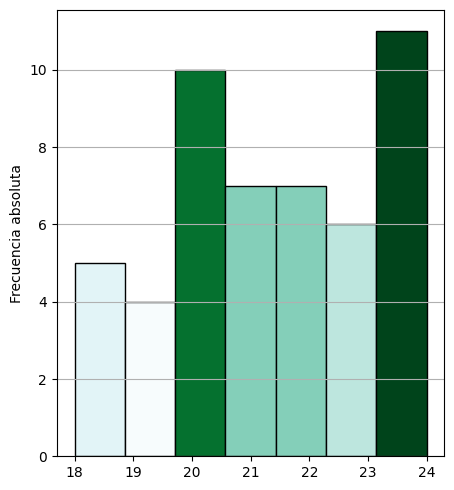


                  ESCOLARIDAD            


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Pastel2')


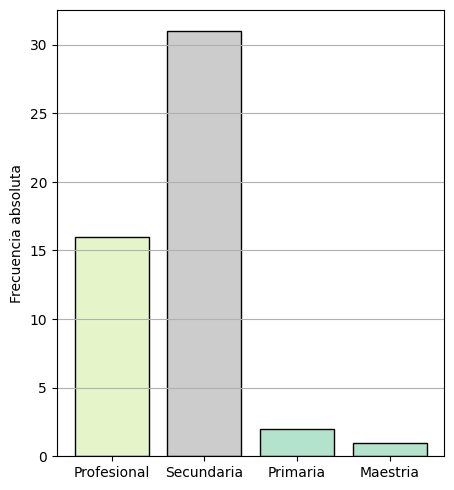


                   ESTRATO      


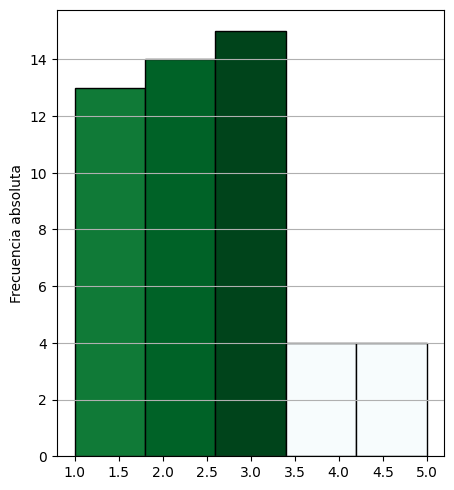


                 GÉNERO


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Set3')


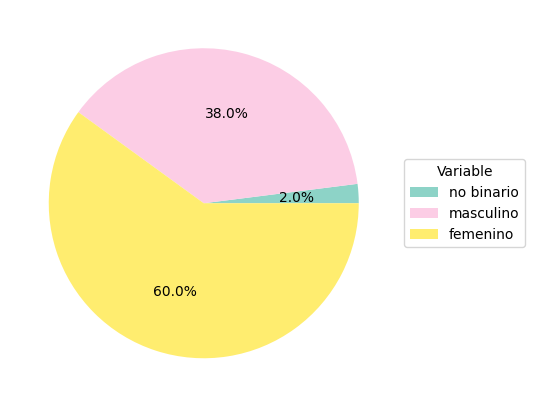


                  PROMEDIO


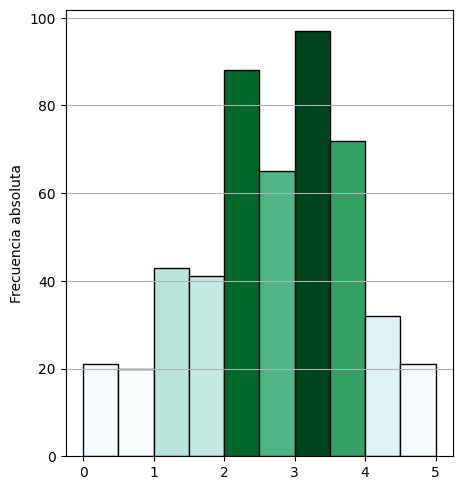


               REGIÓN


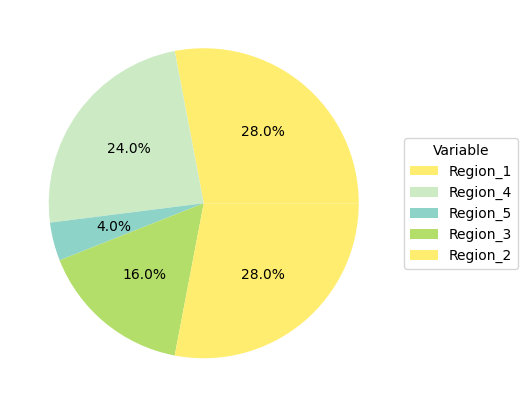

None


In [22]:
# Implementa tu respuesta en esta celda
def herramienta_propuesta_graficas():
    print('                       HERRAMIENTA INTERACTIVA PARA DISTRIBUCIÓN DE BECAS')
    N = ingresar_valor('Ingrese el número de becas que desee asignar:')
    min_edad = ingresar_valor('Ingrese el límite mínimo de edad. Este debe ser un número entero:')
    max_edad = ingresar_valor('Ingrese el límite máximo de edad. Este debe ser un número entero:')

    print('\nA continuación deberá ingresar las características que desea incluir, las cuales pueden ser: genero, estrato y/o region. Estas deben estar escritas en minusculas y sin tildes. En caso de que no desee incluir más características, debera escribir NO.')

    caracteristicas = []
    for i in range(3):
        caract = str(input('Ingrese la característica o "NO" si ya las ingresó previamente:'))
        if caract != "NO":
            caracteristicas.append(caract)
    
    BECADOS = HERRAMIENTA_ANALITICA(N, min_edad, max_edad, caracteristicas)
    print(f'Lista de becados: {BECADOS}')
    
    graficas_becados(BECADOS)
    return

print(herramienta_propuesta_graficas())

#### Configuración de propuestas

                       HERRAMIENTA INTERACTIVA PARA DISTRIBUCIÓN DE BECAS

A continuación deberá ingresar las características que desea incluir, las cuales pueden ser: genero, estrato y/o region. Estas deben estar escritas en minusculas y sin tildes. En caso de que no desee incluir más características, debera escribir NO.
A continuación debera ingresar el porcentaje de becas que desea asignarle a cada grupo. 
 
ATENCIÓN: Debe tener en cuenta que el sistema lo deja ingresar todos los porcentajes para cada grupo, mientras estos sean números mayores o iguales a cero. 
 
Este despues ira asignado las becas en el orden en que ingresó los porcentajes, pero si encuentra un porcentaje equivalente a superar las becas disponibles, asignara a ese grupo las becas que falten por asignar (si hay personas en el grupo que reciban estas becas), o si el número de becas asignado es mayor que en número de cupos, se asignará el máximo de cupos. 
 
Por lo tanto, los grupos que se encuentren al final del ing

C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('BuGn')


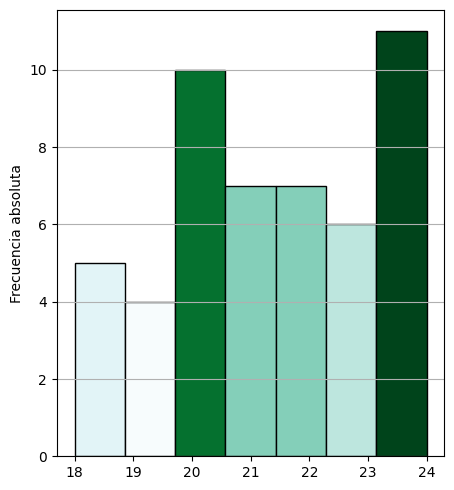


                  ESCOLARIDAD            


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Pastel2')


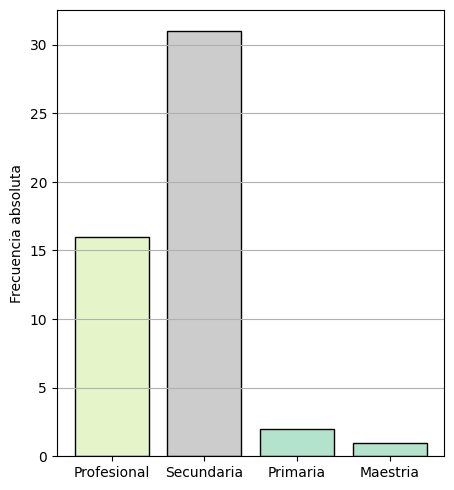


                   ESTRATO      


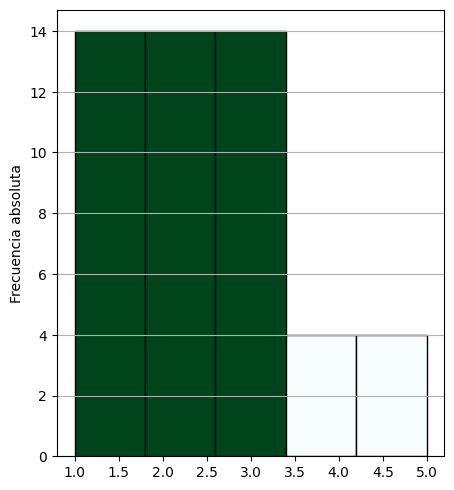


                 GÉNERO


C:\Users\HP\AppData\Local\Temp\ipykernel_14904\2567587538.py:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('Set3')


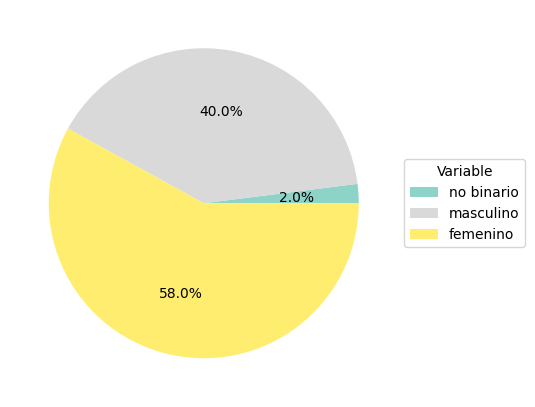


                  PROMEDIO


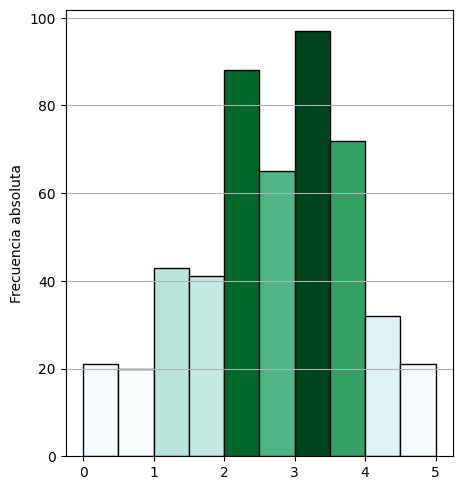


               REGIÓN


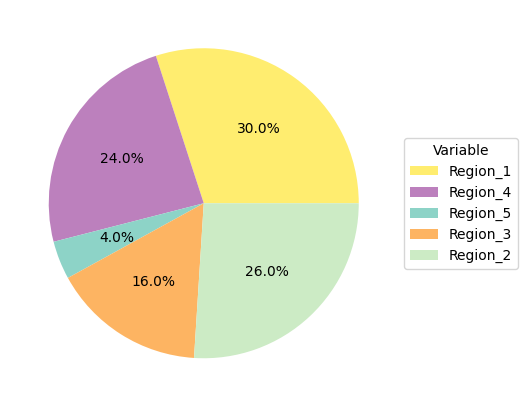

None
FALENCIA:
- Se favoreció a la región 4, en comparación con la propuesta 2 del comité. Esto es una falencia al suponer que de la región 4, provienen personas que pudieron haber tenido mejores condiciones y oportunidades que de otras regiones como la region 5.

- Al no incluir estrato, se favoreció levemente a personas en estratos entre 3 y 4.


VIRTUDES:
- Se favorecen a poblaciones con menores edades que las propuestas 1 y 2, con el propósito de brindarles oportunidades a los jovenes e impactar en otros aspectos sociales.

- Se hace una discriminación positiva especialmente con el género, mejorando la población de generos diferentes a femenino y masculino, como lo es el no binario.

- Se realiza una mayor asignación de becas a mujeres, por lo que representa una forma de abordar la desigualdad histórica y promover la equidad de género.

- Esta propuesta favorece a las minorias. A diferencia de la propuesta 1 en la que al asignar los porcentajes proporcionalmente a la distribución d

In [23]:
# Implementa tu respuesta en esta celda
print(herramienta_propuesta_graficas())

# Becas 100
# Edad 20 - 35
# Genero y región
#[('Region_1', 'femenino'), ('Region_1', 'masculino'), ('Region_1', 'no binario'), ('Region_1', 'otro'), ('Region_2', 'femenino'), ('Region_2', 'masculino'), ('Region_2', 'no binario'), ('Region_3', 'femenino'), ('Region_3', 'masculino'), ('Region_3', 'otro'), ('Region_4', 'femenino'), ('Region_4', 'masculino'), ('Region_4', 'no binario'), ('Region_5', 'femenino'), ('Region_5', 'masculino'), ('Region_5', 'no binario')] 16)
# [8,5,3,4,9,5,5,9,7,5,7,6,7,10,7,3]
"""
Se eligió esta propuesta debido a que la población de personas encuestadas se encuentran principalmente en el rango entre 20 y 35 años. Además, teniendo en cuenta el análisis de formulación del programa “Ser Pilo Paga”, la tasa de cobertura del nivel superior se encuentra en un 49% y muchas personas entre ese rango de edad, no se encuentran matriculados en pregado.

En la propuesta no se eligió el parametro de estrato, ya que la mayoria de las personas encuestadas se encuentra en estratos bajos, por lo que se prefiere priorizar de acuerdo al género y región.
"""
print("""FALENCIA:
- Se favoreció a la región 4, en comparación con la propuesta 2 del comité. Esto es una falencia al suponer que de la región 4, provienen personas que pudieron haber tenido mejores condiciones y oportunidades que de otras regiones como la region 5.\n
- Al no incluir estrato, se favoreció levemente a personas en estratos entre 3 y 4.\n
""")
print("""VIRTUDES:
- Se favorecen a poblaciones con menores edades que las propuestas 1 y 2, con el propósito de brindarles oportunidades a los jovenes e impactar en otros aspectos sociales.\n
- Se hace una discriminación positiva especialmente con el género, mejorando la población de generos diferentes a femenino y masculino, como lo es el no binario.\n
- Se realiza una mayor asignación de becas a mujeres, por lo que representa una forma de abordar la desigualdad histórica y promover la equidad de género.\n
- Esta propuesta favorece a las minorias. A diferencia de la propuesta 1 en la que al asignar los porcentajes proporcionalmente a la distribución de generos y regiones se mantiene la brecha de oportunidades, puesto que hay menos probabilidad de darle una beca a estas poblaciones minoritarias.\n
""")

## Referencias

* Discriminación Positiva<br>
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049